In [2]:
import pandas as pd
train_data=pd.read_csv("train.csv")
train_data.head()


,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [3]:
train_data.shape

(113845, 2)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113845 entries, 0 to 113844
Data columns (total 2 columns):
Id          113845 non-null int64
Sequence    113845 non-null object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
train_data['Sequence']

(113845,)

In [15]:
def get_number_of_elements(row):
    row['count']=len(row['Sequence'].split(','))
    return row

In [23]:
train_data=train_data.apply(get_number_of_elements,axis=1)

In [24]:
train_data.columns.tolist()

['Id', 'Sequence', 'count']

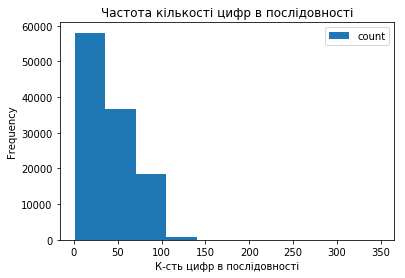

In [30]:
import matplotlib.pyplot as plt
train_data[['count']].plot(kind='hist')
plt.title('Частота кількості цифр в послідовності')
plt.xlabel('К-сть цифр в послідовності')
plt.show()


In [72]:
# зростаючі,спадаючі, монотонні послідовності
def get_up_down_monot(row):
    x=list(row['Sequence'].split(','))
    x=[int(el) for el in x]
    up=True
    down=True
    mon=False
    for i in range(1,len(x)):
        if x[i-1]>x[i]:
            up=False
        else:
            down=False
        if up==False and down==False:
            mon=True
            break
    if up:
        row['way']='increase'
    elif down:
        row['way']='decrease'
    else:
        row['way']='monotonic'
    return row

In [73]:
train_data=train_data.apply(get_up_down_monot,axis=1)
print(train_data.columns.tolist())

['Id', 'Sequence', 'count', 'way', 'max_order']


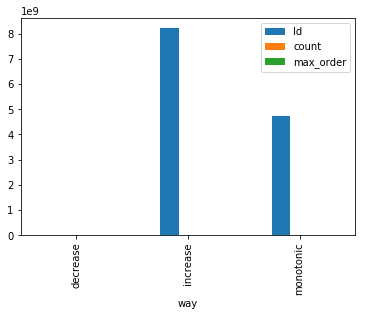

In [87]:
train_data.groupby(['way']).sum().plot(kind='bar')
plt.show()
# набагато більше визначених(зростаючих+спад)ніж монотонних

In [45]:
def get_max_order(row):
    x=row['Sequence'].split(',')
    max_order=max([len(el) for el in x])
    row['max_order']=max_order
    return row


In [46]:
train_data=train_data.apply(get_max_order,axis=1)
train_data.columns.tolist()

['Id', 'Sequence', 'count', 'way', 'max_order']

In [51]:
# train_data.groupby(['max_order']).sum().plot(kind='bar')
# plt.show()
train_data[['max_order']].describe()

,max_order
count,113845.000000
mean,10.229180
std,12.014789
min,1.000000
25%,3.000000
50%,6.000000
75%,14.000000
max,285.000000


In [103]:
train_data[train_data['max_order']==1].shape

(8610, 5)

In [91]:
train_data[train_data['way']=='monotonic'].shape

(41417, 5)

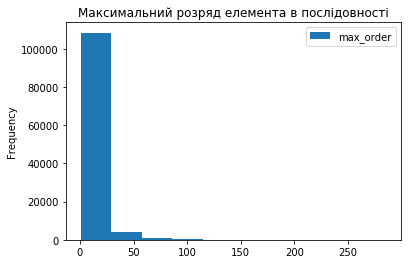

In [108]:
train_data[['max_order']].plot(kind='hist')
plt.title('Максимальний розряд елемента в послідовності')
plt.show()


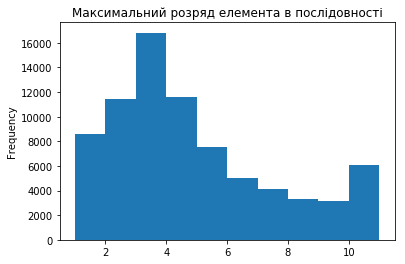

In [110]:
train_data[train_data['max_order']<12]['max_order'].plot(kind='hist')
plt.title('Максимальний(<12) розряд елемента в послідовності ')
plt.show()

In [ ]:
train_data[train_data['max_order']==100]